In [1]:
#David Fouhey
#Rendering a cube with varying focal length / width
#UMich EECS 442 Fall 2019

import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import os
import imageio

###Helper stuff
def rr():
  #Return a random rotation matrix
  U,_,Vt = np.linalg.svd(np.random.uniform(size=(3,3)))
  #don't change the handedness...
  return np.dot(U,Vt) / np.linalg.det(U) / np.linalg.det(Vt)

def generateCube():
  #return a Nx6 collection of the lines of a unit cube ranging in 
  #x and y from -0.5 to 0.5, and z from 0 to 1
  lines = []
  for x,y,z in product([0,1],[0,1],[0,1]):
    #all corners, check changing all the dirensions
    #if in the cube, keep, but then center at 0
    for dx, dy, dz in [(1,0,0),(-1,0,0),(0,1,0),(0,-1,0),(0,0,1),(0,0,-1)]:
      xp, yp, zp = x+dx, y+dy, z+dz
      if min([xp,yp,zp]) >= 0 and max([xp,yp,zp]) <= 1:
        
        lines.append((x-0.5,y-0.5,z-0.5,xp-0.5,yp-0.5,zp-0.5))
  return np.vstack(lines)

def xyrange(pL):
  #Given [u1, v1, u2, v2], return the range of u and v
  X, Y = np.vstack([pL[:,0],pL[:,2]]), np.vstack([pL[:,1],pL[:,3]])
  return np.max(X)-np.min(X), np.max(Y) - np.min(Y)
#####


def renderCube(f=1,scaleFToSize=None,t=(0,0,1),R=np.eye(3)):
  #Given:
  #   f -- the focal length
  #   scaleFToSize -- a target size on the retina (sqrt of area)
  #   t -- where the cube is with respect to the camera axes
  #   R -- a rotation 
  #Render the cube
  L = generateCube()
  t = np.array(t)
  pL = projectLines(f,R,t,L)
  
  if scaleFToSize is not None:
    #then adjust f so that the image is the right size
    xRange, yRange = xyrange(pL)
    geoMean = (xRange*yRange)**0.5
    f = (f / geoMean)*scaleFToSize
    #re-render with the right focal length
    pL = projectLines(f,R,t,L)
  
  
  plt.figure()
  plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0],t[1],t[2],f))
  for i in range(pL.shape[0]):
    u1, v1, u2, v2 = pL[i,:]
    plt.plot((u1,u2),(v1,v2),lineWidth=2)
    
  plt.axis('square')
  plt.xlim(-5,5); plt.ylim(-5,5)

  
# np.random.seed(442442)  
# R = rr()
# R = np.eye(3) #or this!
  
# #for a series of zs, render things
# for z in [1,1.25,1.5,2,4,8,16,32,64]:
#   renderCube(scaleFToSize=6,t=(0,0,z+1),R=R)


In [2]:
# for question 1(a), 1(b), 1(c)
#perspective camera 

def projectLines(f,R,t,L):
  #Given:
  #  Nx6 lines [x1,y1,z1,x2,y2,z2]
  #  3x3 rotation matrix R
  #  3x1 translation t
  #  scalar focal length f
  #Return:
  #  Nx4 projection of lines [u1,v1,u2,v2]
  pL = np.zeros((L.shape[0],4))
  for i in range(L.shape[0]):
    #rotate and translate
    p = np.dot(R,L[i,:3])+t
    pp = np.dot(R,L[i,3:])+t
    
    pL[i,:2] = p[0]*f/p[2], p[1]*f/p[2]
    pL[i,2:] = pp[0]*f/pp[2], pp[1]*f/pp[2]
  return np.vstack(pL)    

In [ ]:
# for question 1(d)
#orthographic camera 
def projectLines(f,R,t,L):
  #Given:
  #  Nx6 lines [x1,y1,z1,x2,y2,z2]
  #  3x3 rotation matrix R
  #  3x1 translation t
  #  scalar focal length f
  #Return:
  #  Nx4 projection of lines [u1,v1,u2,v2]
  pL = np.zeros((L.shape[0],4))
  for i in range(L.shape[0]):
    #rotate and translate
    p = np.dot(R,L[i,:3])+t
    pp = np.dot(R,L[i,3:])+t
    #apply projection u = x*f/z; v = y*f/z
  
    pL[i,:2] = p[0]*f , p[1]*f 
    pL[i,2:] = pp[0]*f, pp[1]*f 
  return np.vstack(pL)  

In [ ]:
def rotY(theta):
  return np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])
def rotX(theta):
  return np.array([[1,0,0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])

In [ ]:
 #Call this function to generate gif. make sure you have rotY() implemented.
def generate_gif():
    n_frames = 30
    if not os.path.isdir("frames"):
        os.mkdir("frames")
    fstr = "frames/%d.png"
    for i,theta in enumerate(np.arange(0,2*np.pi,2*np.pi/n_frames)):
        fname = fstr % i
        renderCube(f=15, t=(0,0,3), R=rotY(theta))
        plt.savefig(fname)
        plt.close()

    with imageio.get_writer("cube.gif", mode='I') as writer:
        for i in range(n_frames):
            frame = plt.imread(fstr % i)
            writer.append_data(frame)
            os.remove(fstr%i)
            
    os.rmdir("frames")

**1(a)**

In [ ]:
generate_gif()

**1(b)**

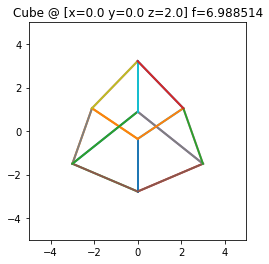

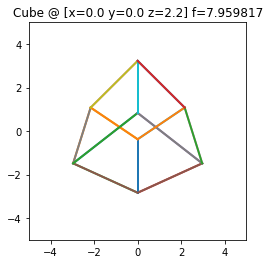

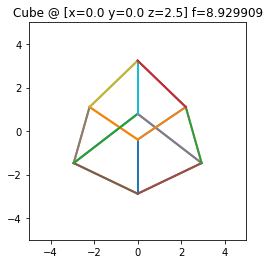

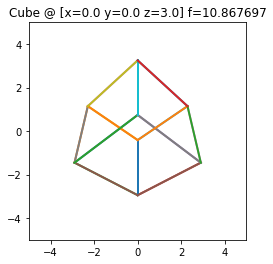

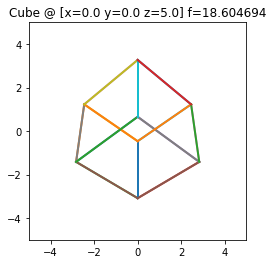

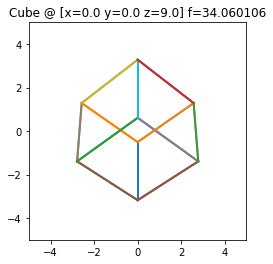

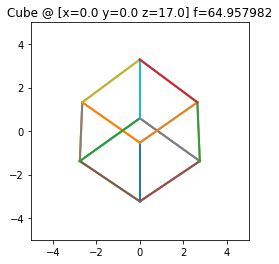

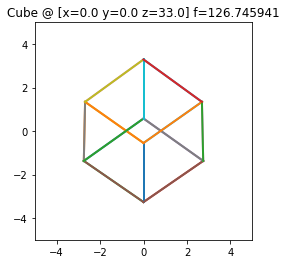

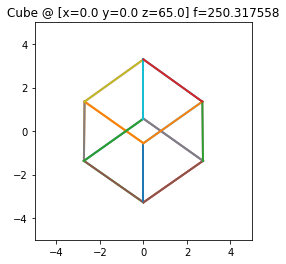

In [ ]:
theta = 0.25*np.pi
R = np.dot(rotX(theta) , rotY(theta))

#for a series of zs, render things
for z in [1,1.25,1.5,2,4,8,16,32,64]:
  renderCube(scaleFToSize=6,t=(0,0,z+1),R=R)

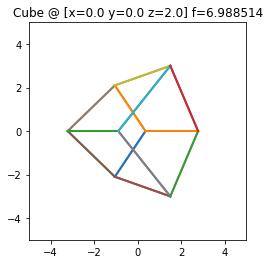

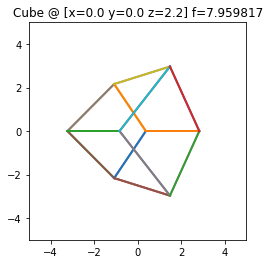

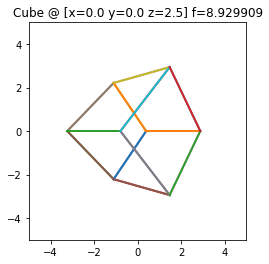

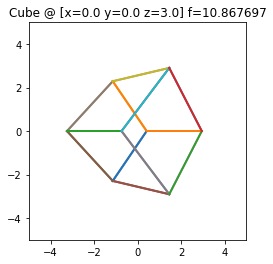

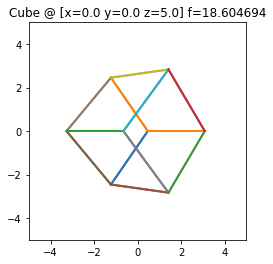

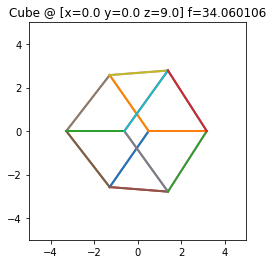

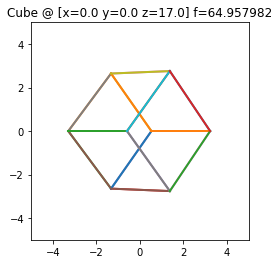

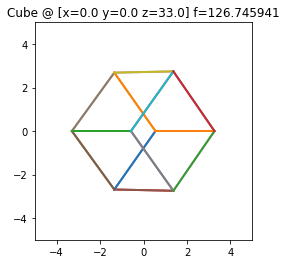

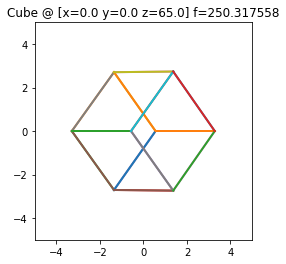

In [ ]:
theta = 0.25*np.pi
R =  np.dot(rotY(theta) ,rotX(theta))

#for a series of zs, render things
for z in [1,1.25,1.5,2,4,8,16,32,64]:
  renderCube(scaleFToSize=6,t=(0,0,z+1),R=R)

**1(c)**

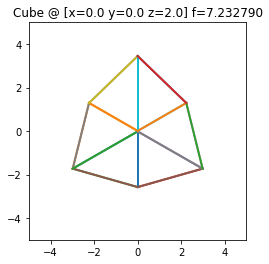

In [ ]:
theta1 = 0.195*np.pi
theta2 = 0.25*np.pi
# R =  np.dot(rotY(0.20*np.pi) ,rotX(theta))
R =  np.dot(rotX(theta1) ,rotY(theta2))
# R =  rotY(theta) + rotX(theta)
z = 1
renderCube(scaleFToSize=6,t=(0,0,z+1),R=R)

**1(d)**

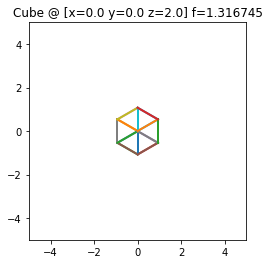

In [ ]:
theta1 = 0.195*np.pi
theta2 = 0.25*np.pi
# R =  np.dot(rotY(0.20*np.pi) ,rotX(theta))
R =  np.dot(rotX(theta1) ,rotY(theta2))
# R =  rotY(theta) + rotX(theta)
z = 1
renderCube(scaleFToSize=2,t=(0.0,0.0,z+1),R=R)